# Setting Parameters

Edit these parameters to change how the program runs.

There should be no need to edit anything rather than these parameters


In [1]:
MAX_ITERATIONS = 1000
NODES = list(range(20, 201, 5))
PAIRS = [5, 7, 9, 11, 13, 15, 17, 19]

# Defining Functions

All the funcitons used are defined here

Function to generate unweighted graphs of given number of nodes

In [2]:
import networkx as nx
def generate_graph(num_nodes):
    """Generates a connected graph using the Watts-Strogatz model."""
    k = 4
    p = 0.3
    return nx.connected_watts_strogatz_graph(num_nodes, k, p, tries=100)

Algorithm to find the MATN path

In [3]:
def matn_path_generate(graph, source, target, dijkstra_path, active_nodes):
    """Finds a path while minimizing inactive nodes usage."""
    dijkstra_inactive_count = sum(1 for node in dijkstra_path if node not in active_nodes)

    best_path = dijkstra_path.copy()
    best_inactive_count = dijkstra_inactive_count

    def dfs(current_node, path, inactive_count, visited):
        nonlocal best_path, best_inactive_count

        if current_node == target:
            if inactive_count < best_inactive_count:
                best_path = path.copy()
                best_inactive_count = inactive_count
            return

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_inactive_count = inactive_count + (1 if neighbor not in active_nodes else 0)
                if new_inactive_count < best_inactive_count:
                    visited.add(neighbor)
                    path.append(neighbor)
                    dfs(neighbor, path, new_inactive_count, visited)
                    path.pop()
                    visited.remove(neighbor)

    initial_inactive_count = sum(1 for node in [source] if node not in active_nodes)
    visited = {source}
    dfs(source, [source], initial_inactive_count, visited)

    if best_path:
        active_nodes.update(best_path)

    return best_path

Generate random communicating pairs of nodes in the network

In [4]:
def generate_pairs(max_pairs):
  import random
  pairs = set()
  while len(pairs) < max_pairs:
    u, v = random.sample(range(max_pairs), 2)
    pairs.add((u, v))
  return pairs

Function to calculate the dijkstra and MATN path for a topology and list of connecting pairs

In [5]:
import time
import matplotlib.pyplot as plt
import random
import tqdm
import pandas as pd

def solve(graph, pairs):

  dijkstra_active_nodes = set()
  dijkstra_edges = set()
  matn_active_nodes = set()
  matn_edges = set()

  result = []

  for index, (u, v) in enumerate(pairs, start=1):
    start_time = time.perf_counter()
    dijkstra_path = nx.dijkstra_path(graph, u, v)
    end_time = time.perf_counter()
    dijkstra_time = end_time - start_time
    dijkstra_active_nodes.update(dijkstra_path)
    dijkstra_edges.update(zip(dijkstra_path[:-1], dijkstra_path[1:]))

    start_time = time.perf_counter()
    matn_path = matn_path_generate(graph, u, v, dijkstra_path, matn_active_nodes)
    end_time = time.perf_counter()
    matn_time = end_time - start_time
    matn_edges.update(zip(matn_path[:-1], matn_path[1:]))

    result.append([len(graph.nodes()), index, len(dijkstra_active_nodes), len(matn_active_nodes), dijkstra_time, matn_time])

  return result

# Master code

In [6]:
import pandas as pd

df = pd.DataFrame(columns=["nodes", "pairs", "dijkstra_active_nodes_count", "matn_active_nodes_count", "dijkstra_time", "matn_time"])

for nodes in NODES:
  print(f"Testing for {MAX_ITERATIONS} different topologies containing {nodes} nodes")
  for iterations in tqdm.tqdm(range(MAX_ITERATIONS)):
    graph = None
    while graph is None:
      graph = generate_graph(nodes)
    pairs = generate_pairs(max(PAIRS))
    results = solve(graph, pairs)
    for result in results:
      df.loc[len(df)] = result

Testing for 1000 different topologies containing 20 nodes


100%|██████████| 1000/1000 [00:13<00:00, 75.56it/s]


Testing for 1000 different topologies containing 25 nodes


100%|██████████| 1000/1000 [00:16<00:00, 62.11it/s]


Testing for 1000 different topologies containing 30 nodes


100%|██████████| 1000/1000 [00:23<00:00, 43.10it/s]


Testing for 1000 different topologies containing 35 nodes


100%|██████████| 1000/1000 [00:35<00:00, 28.24it/s]


Testing for 1000 different topologies containing 40 nodes


100%|██████████| 1000/1000 [00:40<00:00, 24.70it/s]


Testing for 1000 different topologies containing 45 nodes


100%|██████████| 1000/1000 [00:50<00:00, 19.75it/s]


Testing for 1000 different topologies containing 50 nodes


100%|██████████| 1000/1000 [00:58<00:00, 17.14it/s]


Testing for 1000 different topologies containing 55 nodes


100%|██████████| 1000/1000 [01:05<00:00, 15.30it/s]


Testing for 1000 different topologies containing 60 nodes


100%|██████████| 1000/1000 [01:11<00:00, 13.96it/s]


Testing for 1000 different topologies containing 65 nodes


100%|██████████| 1000/1000 [01:15<00:00, 13.22it/s]


Testing for 1000 different topologies containing 70 nodes


100%|██████████| 1000/1000 [01:30<00:00, 11.10it/s]


Testing for 1000 different topologies containing 75 nodes


100%|██████████| 1000/1000 [01:54<00:00,  8.71it/s]


Testing for 1000 different topologies containing 80 nodes


100%|██████████| 1000/1000 [02:09<00:00,  7.71it/s]


Testing for 1000 different topologies containing 85 nodes


100%|██████████| 1000/1000 [02:14<00:00,  7.42it/s]


Testing for 1000 different topologies containing 90 nodes


100%|██████████| 1000/1000 [02:16<00:00,  7.32it/s]


Testing for 1000 different topologies containing 95 nodes


100%|██████████| 1000/1000 [02:19<00:00,  7.19it/s]


Testing for 1000 different topologies containing 100 nodes


100%|██████████| 1000/1000 [02:25<00:00,  6.88it/s]


Testing for 1000 different topologies containing 105 nodes


100%|██████████| 1000/1000 [02:29<00:00,  6.67it/s]


Testing for 1000 different topologies containing 110 nodes


100%|██████████| 1000/1000 [02:37<00:00,  6.34it/s]


Testing for 1000 different topologies containing 115 nodes


100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]


Testing for 1000 different topologies containing 120 nodes


100%|██████████| 1000/1000 [02:57<00:00,  5.63it/s]


Testing for 1000 different topologies containing 125 nodes


100%|██████████| 1000/1000 [03:45<00:00,  4.44it/s]


Testing for 1000 different topologies containing 130 nodes


100%|██████████| 1000/1000 [04:04<00:00,  4.09it/s]


Testing for 1000 different topologies containing 135 nodes


100%|██████████| 1000/1000 [04:11<00:00,  3.98it/s]


Testing for 1000 different topologies containing 140 nodes


100%|██████████| 1000/1000 [04:10<00:00,  3.99it/s]


Testing for 1000 different topologies containing 145 nodes


100%|██████████| 1000/1000 [04:24<00:00,  3.79it/s]


Testing for 1000 different topologies containing 150 nodes


100%|██████████| 1000/1000 [04:31<00:00,  3.68it/s]


Testing for 1000 different topologies containing 155 nodes


100%|██████████| 1000/1000 [04:33<00:00,  3.65it/s]


Testing for 1000 different topologies containing 160 nodes


100%|██████████| 1000/1000 [04:37<00:00,  3.60it/s]


Testing for 1000 different topologies containing 165 nodes


100%|██████████| 1000/1000 [04:48<00:00,  3.47it/s]


Testing for 1000 different topologies containing 170 nodes


100%|██████████| 1000/1000 [04:52<00:00,  3.41it/s]


Testing for 1000 different topologies containing 175 nodes


100%|██████████| 1000/1000 [04:59<00:00,  3.34it/s]


Testing for 1000 different topologies containing 180 nodes


100%|██████████| 1000/1000 [05:05<00:00,  3.27it/s]


Testing for 1000 different topologies containing 185 nodes


100%|██████████| 1000/1000 [05:08<00:00,  3.24it/s]


Testing for 1000 different topologies containing 190 nodes


100%|██████████| 1000/1000 [05:10<00:00,  3.22it/s]


Testing for 1000 different topologies containing 195 nodes


100%|██████████| 1000/1000 [05:15<00:00,  3.17it/s]


Testing for 1000 different topologies containing 200 nodes


100%|██████████| 1000/1000 [05:21<00:00,  3.11it/s]


# Results

> NOTE: The MATN optimization is applied over the Dijkstra calculations, and
the matn_time is the time required to apply the MATN optimization over the existing Djikstra path

In [7]:
df.describe()

,nodes,pairs,dijkstra_active_nodes_count,matn_active_nodes_count,dijkstra_time,matn_time
count,703000.000000,703000.000000,703000.000000,703000.000000,703000.000000,703000.000000
mean,110.000000,10.000000,18.267484,14.707117,0.000055,0.000068
std,53.385429,5.477229,7.147883,4.708964,0.000180,0.000782
min,20.000000,1.000000,2.000000,2.000000,0.000004,0.000001
25%,65.000000,5.000000,14.000000,12.000000,0.000017,0.000003
50%,110.000000,10.000000,19.000000,16.000000,0.000037,0.000007
75%,155.000000,15.000000,23.000000,18.000000,0.000076,0.000026
max,200.000000,19.000000,54.000000,30.000000,0.060827,0.253293


For 5 Pairs


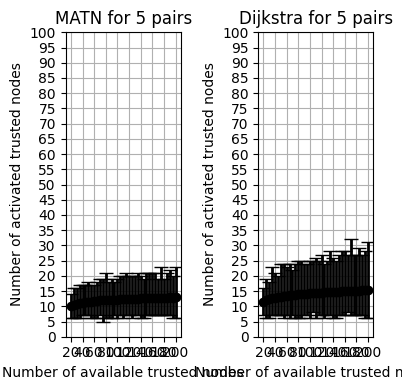

For 7 Pairs


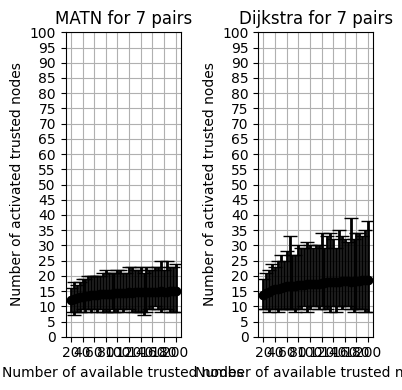

For 9 Pairs


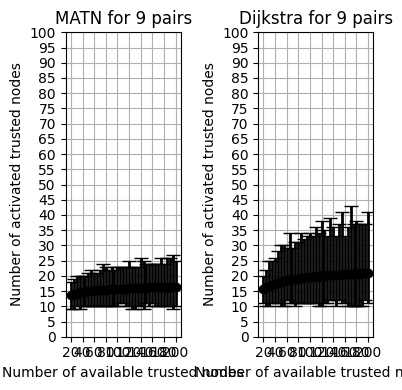

For 11 Pairs


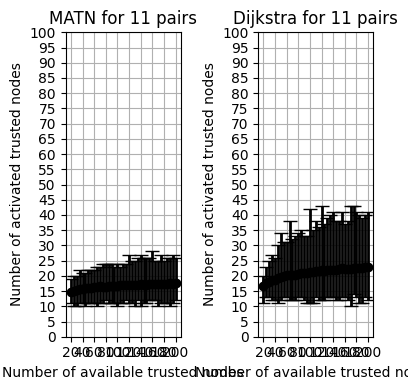

For 13 Pairs


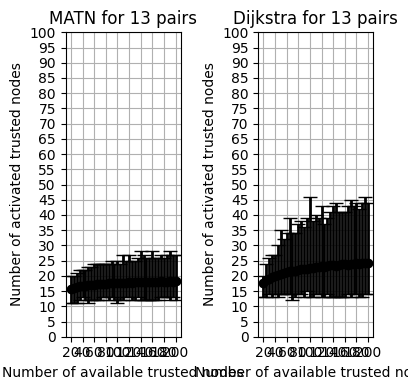

For 15 Pairs


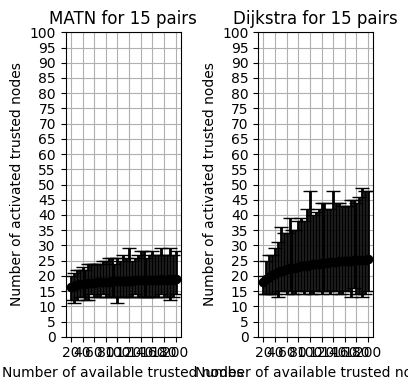

For 17 Pairs


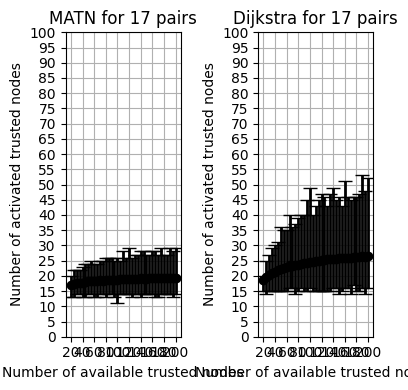

For 19 Pairs


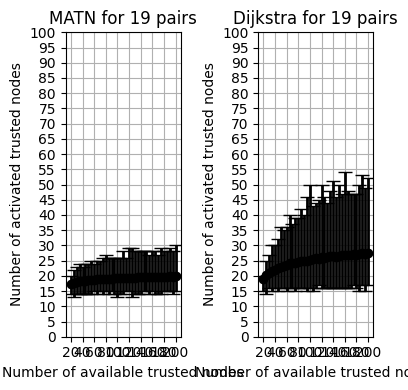

In [9]:
import numpy as np
import matplotlib.pyplot as plt

for num_pairs in PAIRS:

  print(f"For {num_pairs} Pairs")

  fig, axs = plt.subplots(1, 2, figsize=(4, 4))

  y_values_matn = df["matn_active_nodes_count"][df['pairs'] == num_pairs]
  mean_values_matn = y_values_matn.groupby(df["nodes"]).mean()
  min_values_matn = y_values_matn.groupby(df["nodes"]).min()
  max_values_matn = y_values_matn.groupby(df["nodes"]).max()

  lower_error_matn = mean_values_matn - min_values_matn
  upper_error_matn = max_values_matn - mean_values_matn
  errors_matn = [lower_error_matn, upper_error_matn]

  axs[0].errorbar(mean_values_matn.index, mean_values_matn, yerr=errors_matn, fmt='o', capsize=5, color='black', linewidth=2)
  axs[0].set_xlabel("Number of available trusted nodes")
  axs[0].set_ylabel("Number of activated trusted nodes")
  axs[0].set_title(f"MATN for {num_pairs} pairs")
  axs[0].grid(True)

  y_values_dijkstra = df["dijkstra_active_nodes_count"][df['pairs'] == num_pairs]
  mean_values_dijkstra = y_values_dijkstra.groupby(df["nodes"]).mean()
  min_values_dijkstra = y_values_dijkstra.groupby(df["nodes"]).min()
  max_values_dijkstra = y_values_dijkstra.groupby(df["nodes"]).max()

  lower_error_dijkstra = mean_values_dijkstra - min_values_dijkstra
  upper_error_dijkstra = max_values_dijkstra - mean_values_dijkstra
  errors_dijkstra = [lower_error_dijkstra, upper_error_dijkstra]

  axs[1].errorbar(mean_values_dijkstra.index, mean_values_dijkstra, yerr=errors_dijkstra, fmt='o', capsize=5, color='black', linewidth=2)
  axs[1].set_xlabel("Number of available trusted nodes")
  axs[1].set_ylabel("Number of activated trusted nodes")
  axs[1].set_title(f"Dijkstra for {num_pairs} pairs")
  axs[1].grid(True)

  axs[0].set_xticks(np.arange(min(NODES), max(NODES) + 1, 20))
  axs[0].set_yticks(np.arange(0, max(NODES)/2 + 1, 5))
  axs[1].set_xticks(np.arange(min(NODES), max(NODES) + 1, 20))
  axs[1].set_yticks(np.arange(0, max(NODES)/2 + 1, 5))

  plt.tight_layout()
  plt.show()

In [10]:
df.to_csv('data.csv', index=False)

For 5 Pairs


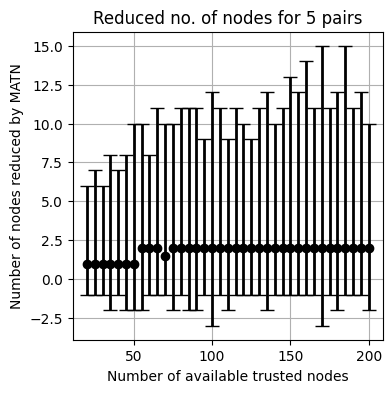

For 7 Pairs


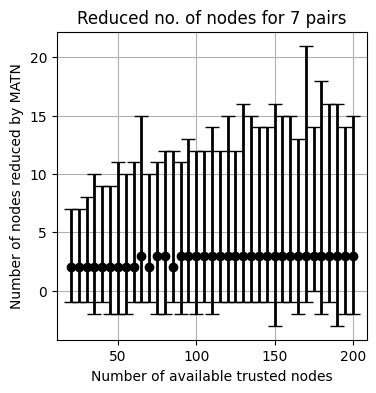

For 9 Pairs


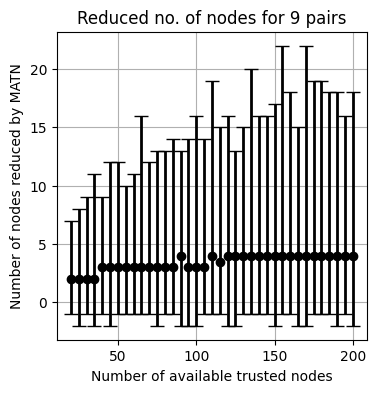

For 11 Pairs


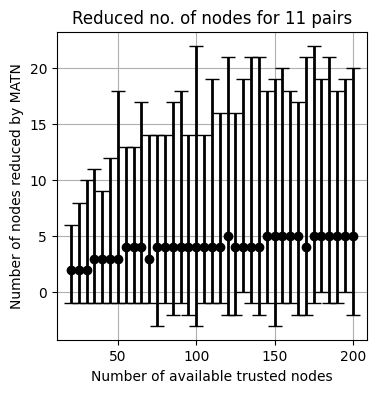

For 13 Pairs


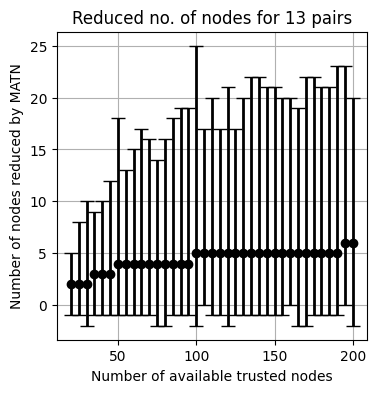

For 15 Pairs


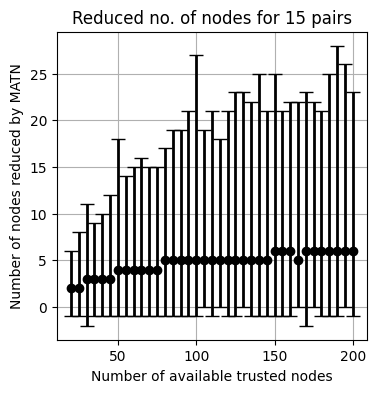

For 17 Pairs


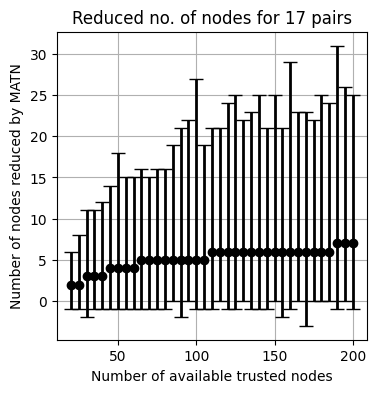

For 19 Pairs


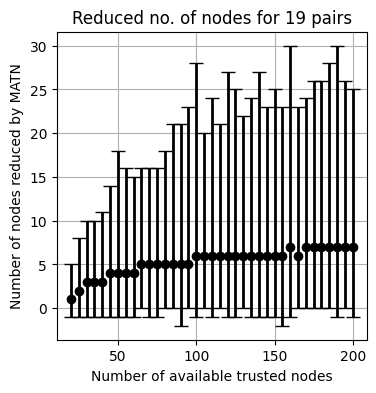

In [11]:
import numpy as np
import matplotlib.pyplot as plt

for num_pairs in PAIRS:

  print(f"For {num_pairs} Pairs")

  fig, axs = plt.subplots(1, 1, figsize=(4, 4))

  y_values_matn = df["dijkstra_active_nodes_count"][df['pairs'] == num_pairs] - df["matn_active_nodes_count"][df['pairs'] == num_pairs]
  mean_values_matn = y_values_matn.groupby(df["nodes"]).median()
  min_values_matn = y_values_matn.groupby(df["nodes"]).min()
  max_values_matn = y_values_matn.groupby(df["nodes"]).max()

  lower_error_matn = mean_values_matn - min_values_matn
  upper_error_matn = max_values_matn - mean_values_matn
  errors_matn = [lower_error_matn, upper_error_matn]

  axs.errorbar(mean_values_matn.index, mean_values_matn, yerr=errors_matn, fmt='o', capsize=5, color='black', linewidth=2)
  axs.set_xlabel("Number of available trusted nodes")
  axs.set_ylabel("Number of nodes reduced by MATN")
  axs.set_title(f"Reduced no. of nodes for {num_pairs} pairs")
  axs.grid(True)
  plt.show()

In [12]:
df.describe()

,nodes,pairs,dijkstra_active_nodes_count,matn_active_nodes_count,dijkstra_time,matn_time
count,703000.000000,703000.000000,703000.000000,703000.000000,703000.000000,703000.000000
mean,110.000000,10.000000,18.267484,14.707117,0.000055,0.000068
std,53.385429,5.477229,7.147883,4.708964,0.000180,0.000782
min,20.000000,1.000000,2.000000,2.000000,0.000004,0.000001
25%,65.000000,5.000000,14.000000,12.000000,0.000017,0.000003
50%,110.000000,10.000000,19.000000,16.000000,0.000037,0.000007
75%,155.000000,15.000000,23.000000,18.000000,0.000076,0.000026
max,200.000000,19.000000,54.000000,30.000000,0.060827,0.253293


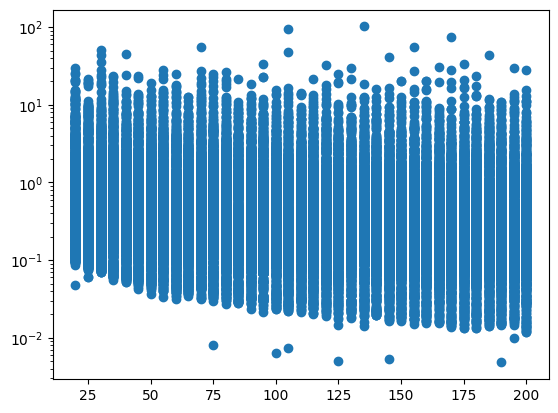

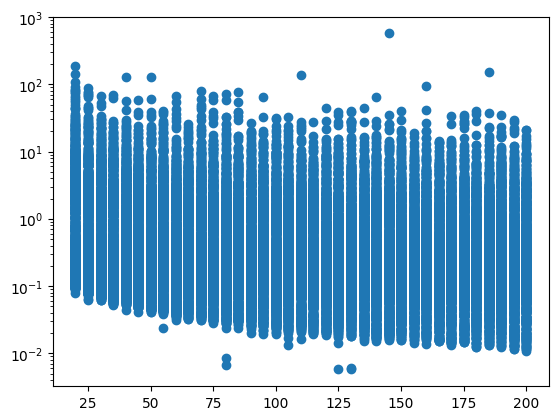

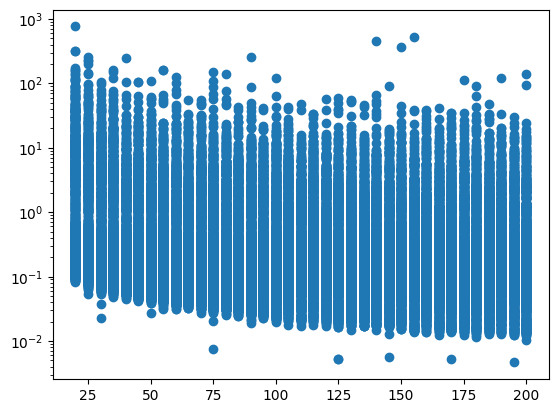

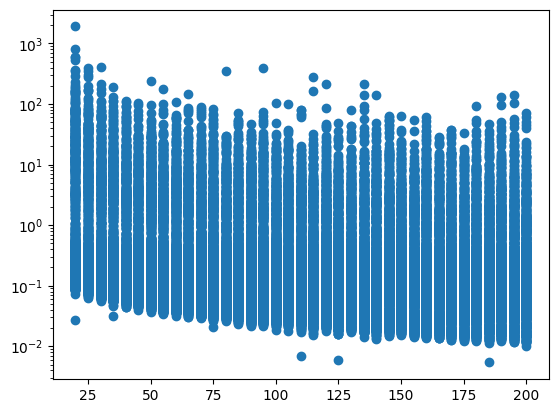

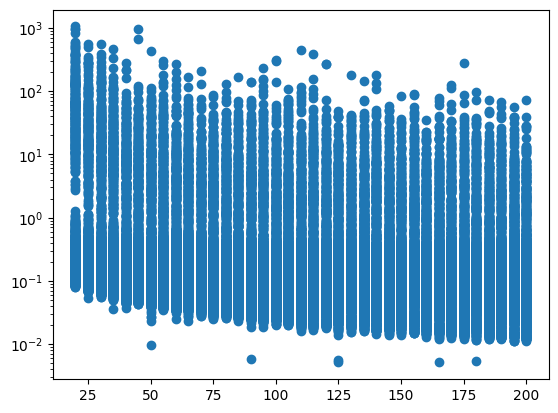

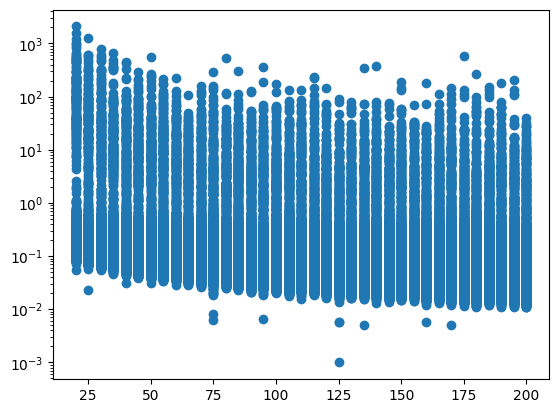

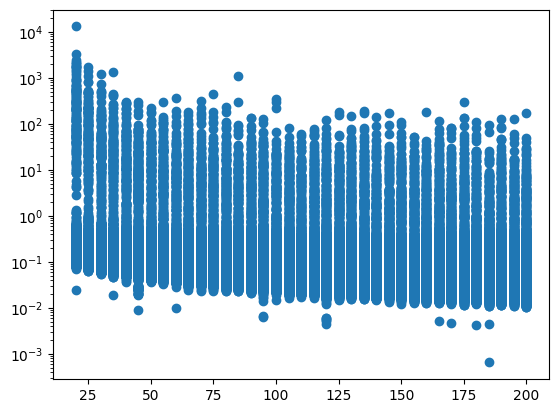

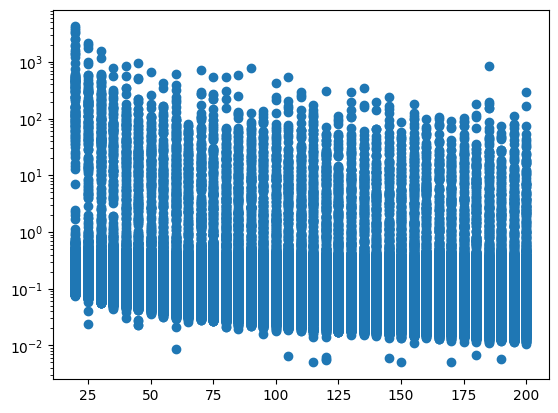

In [21]:
import numpy as np
import matplotlib.pyplot as plt

for num_pairs in PAIRS:
  y_values_matn = df["matn_time"][df['pairs'] == num_pairs] / df["dijkstra_time"][df['pairs'] == num_pairs]

  x_values_matn = df["nodes"][df['pairs'] == num_pairs]

  plt.scatter(x_values_matn, y_values_matn)
  plt.yticks(range(0, int(max(x_values_matn)), 10))
  plt.yscale('log')
  plt.show()